In [1]:
import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot  as plt
import numpy as np
import cv2
%matplotlib widget

In [2]:
train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()

AttributeError: module 'mnist' has no attribute 'train_images'

In [3]:
train_images.shape

NameError: name 'train_images' is not defined

In [6]:
plt.close()

plt.imshow(train_images[2])

plt.show()

print(train_labels[2])

NameError: name 'train_images' is not defined

In [5]:
train_images=train_images/255
test_images=test_images/255

NameError: name 'train_images' is not defined

In [ ]:
train_images[0]

In [18]:
train_images=np.expand_dims(train_images,axis=3)
test_images=np.expand_dims(test_images,axis=3)

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [21]:
model=Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2702 - accuracy: 0.9255 - val_loss: 0.1226 - val_accuracy: 0.9629
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0951 - accuracy: 0.9717 - val_loss: 0.0756 - val_accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0665 - accuracy: 0.9805 - val_loss: 0.0610 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0546 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0497 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0552 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0551 - val_accuracy

In [25]:
model.save('ocr.h5')

In [26]:
out=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


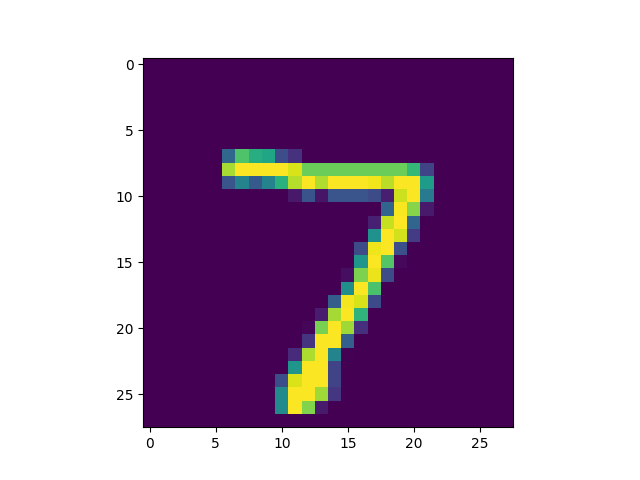

7


In [28]:
plt.close()

plt.imshow(test_images[0])

plt.show()

print(test_labels[0])

In [27]:
out[0]

array([ -7.7145805 ,  -2.95895   ,   0.38148403,   1.6815965 ,
        -9.058028  ,  -6.6207333 , -20.822285  ,  15.367444  ,
        -6.810512  ,  -0.71761495], dtype=float32)

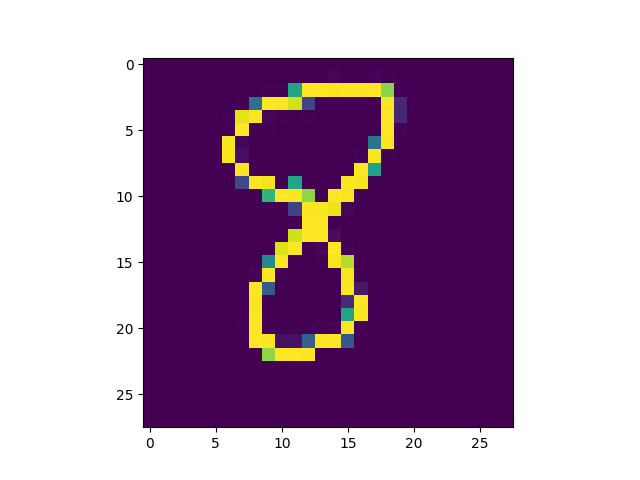

1/1 [==============================] - 0s 44ms/step
8


In [48]:

# model.load_weights('ocr.h5')


img=cv2.imread('8.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))


img= cv2.bitwise_not(img)



img = img/255





plt.close()

plt.imshow(img)

plt.show()

img= np.array([img])


img=np.expand_dims(img, axis=3)


out2= model.predict(img)

m=-1000
o2=out2[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(ind)